In [88]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [89]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [90]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [91]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [92]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

lebu cl
ribeira grande pt
san patricio mx
avarua ck
bredasdorp za
chulman ru
bluff nz
torbay ca
la ronge ca
pavilosta lv
ushuaia ar
kapaa us
port alfred za
ribeira grande pt
mataura pf
busselton au
matara lk
saint-pierre pm
polyarnyy ru
san policarpo ph
hilo us
narsaq gl
punta arenas cl
pemangkat id
ismailia eg
kahului us
hobart au
shubarkuduk kz
albany au
dzhusaly kz
port alfred za
brae gb
busselton au
jamestown sh
hobart au
kavieng pg
san juan us
mahibadhoo mv
bluff nz
port alfred za
misratah ly
ushuaia ar
mar del plata ar
mataura pf
avarua ck
punta arenas cl
palora ec
cape town za
new norfolk au
busselton au
touros br
tiksi ru
kavieng pg
busselton au
longyearbyen sj
narsaq gl
tasiilaq gl
rikitea pf
tuatapere nz
mataura pf
port elizabeth za
evensk ru
hithadhoo mv
seymchan ru
koslan ru
talcahuano cl
rikitea pf
ushuaia ar
asau tv
albany au
arraial do cabo br
ugoofaaru mv
busselton au
thompson ca
mahebourg mu
new norfolk au
port alfred za
east patchogue us
gizo sb
vaini to
comodoro riva

port alfred za
rikitea pf
magnolia us
rock springs us
karratha au
hobart au
nikolskoye ru
raymondville us
cockburn town bs
pevek ru
puerto escondido mx
sonqor ir
grindavik is
ushuaia ar
port elizabeth za
tsihombe mg
port-gentil ga
tasiilaq gl
guerrero negro mx
belushya guba ru
vaini to
hobyo so
rikitea pf
provideniya ru
hilo us
kapaa us
taolanaro mg
mergui mm
yellowknife ca
saldanha za
ushuaia ar
victoria sc
oranjestad aw
bluff nz
avarua ck
russellville us
rosarito mx
piney green us
arlit ne
rio gallegos ar
sinop tr
ushuaia ar
cape town za
kapaa us
santa cruz de tenerife es
east london za
cidreira br
hasaki jp
kodiak us
delta del tigre uy
nikolskoye ru
bogomila mk
ankazoabo mg
chernenko ru
ostrovnoy ru
saskylakh ru
alyangula au
qaanaaq gl
butaritari ki
cape town za
alofi nu
longyearbyen sj
prado br
atuona pf
bara sd
nosy varika mg
thompson ca
pevek ru
oranjestad aw
bengkulu id
new norfolk au
hualmay pe
puerto baquerizo moreno ec
iracoubo gf
norman wells ca
hovd mn
the valley ai
kuching

kapaa us
hermanus za
westport ie
callaway us
khatanga ru
xushan cn
punta arenas cl
cape town za
nizhneyansk ru
bonavista ca
tenenkou ml
sao filipe cv
college us
hithadhoo mv
ballina au
mataura pf
yellowknife ca
ahipara nz
avarua ck
new norfolk au
bredasdorp za
ushuaia ar
vaini to
pevek ru
barrow us
huicungo pe
khatanga ru
hobart au


In [93]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [94]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d496981f3ab4ab4fbc15adae63ab96


In [95]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | chulman
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | pavilosta
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | matara
Processing Record 17 of Set 1 | saint-pierre
Processing Record 18 of Set 1 | polyarnyy
Processing Record 19 of Set 1 | san policarpo
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | pemangkat

City not found. Skipping...
Processing Record 38 of Set 4 | kingsville
Processing Record 39 of Set 4 | santa isabel do rio negro
Processing Record 40 of Set 4 | alamogordo
Processing Record 41 of Set 4 | bud
Processing Record 42 of Set 4 | ponta delgada
Processing Record 43 of Set 4 | liverpool
Processing Record 44 of Set 4 | rio grande
Processing Record 45 of Set 4 | serebryanyy bor
Processing Record 46 of Set 4 | de-kastri
Processing Record 47 of Set 4 | vuktyl
Processing Record 48 of Set 4 | mehamn
Processing Record 49 of Set 4 | marcona
City not found. Skipping...
Processing Record 50 of Set 4 | monrovia
Processing Record 1 of Set 5 | beira
Processing Record 2 of Set 5 | venado tuerto
Processing Record 3 of Set 5 | yendi
Processing Record 4 of Set 5 | sioux lookout
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | chifeng
Processing Record 7 of Set 5 | torrington
Processing Record 8 of Set 5 | namatanai
Processing Record 9 of Set 5 | san luis
Processing Record 10 

Processing Record 26 of Set 8 | vidim
Processing Record 27 of Set 8 | inhambane
Processing Record 28 of Set 8 | porto san giorgio
Processing Record 29 of Set 8 | hobyo
Processing Record 30 of Set 8 | znamenskoye
Processing Record 31 of Set 8 | magnolia
Processing Record 32 of Set 8 | rock springs
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | raymondville
Processing Record 35 of Set 8 | cockburn town
Processing Record 36 of Set 8 | sonqor
Processing Record 37 of Set 8 | port-gentil
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | mergui
City not found. Skipping...
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | oranjestad
Processing Record 42 of Set 8 | russellville
Processing Record 43 of Set 8 | rosarito
Processing Record 44 of Set 8 | piney green
Processing Record 45 of Set 8 | arlit
Processing Record 46 of Set 8 | sinop
Processing Record 47 of Set 8 | santa cruz de tenerife
Processing Record 48 of Set 

Processing Record 15 of Set 12 | bolshegrivskoye
City not found. Skipping...
Processing Record 16 of Set 12 | mao
Processing Record 17 of Set 12 | yuryevets
Processing Record 18 of Set 12 | sandila
Processing Record 19 of Set 12 | bilma
Processing Record 20 of Set 12 | acapulco
Processing Record 21 of Set 12 | sabang
Processing Record 22 of Set 12 | zhuhai
Processing Record 23 of Set 12 | kavaratti
Processing Record 24 of Set 12 | batouri
Processing Record 25 of Set 12 | yashan
Processing Record 26 of Set 12 | hermiston
Processing Record 27 of Set 12 | sirsa
Processing Record 28 of Set 12 | zabid
Processing Record 29 of Set 12 | pampa
Processing Record 30 of Set 12 | kodaikanal
Processing Record 31 of Set 12 | kirksville
Processing Record 32 of Set 12 | talaya
Processing Record 33 of Set 12 | porto santo
Processing Record 34 of Set 12 | nilakkottai
Processing Record 35 of Set 12 | turayf
Processing Record 36 of Set 12 | kendari
Processing Record 37 of Set 12 | ouallam
Processing Record

In [96]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,47.70,90,85,6.85,CL,2021-10-01 04:53:21
1,Ribeira Grande,38.5167,-28.7000,71.10,85,18,3.85,PT,2021-10-01 04:53:26
2,San Patricio,28.0170,-97.5169,82.81,83,62,9.19,US,2021-10-01 04:53:26
3,Avarua,-21.2078,-159.7750,77.05,78,42,4.61,CK,2021-10-01 04:53:27
4,Bredasdorp,-34.5322,20.0403,56.52,88,98,14.97,ZA,2021-10-01 04:53:15
5,Chulman,56.8479,124.9104,30.34,89,100,10.54,RU,2021-10-01 04:53:27
6,Bluff,-46.6000,168.3333,52.81,78,46,23.53,NZ,2021-10-01 04:53:16
7,Torbay,47.6666,-52.7314,61.57,99,90,4.61,CA,2021-10-01 04:53:28
8,La Ronge,55.1001,-105.2842,59.25,47,1,10.36,CA,2021-10-01 04:53:28
9,Pavilosta,56.8879,21.1859,49.95,90,70,11.01,LV,2021-10-01 04:53:29


In [97]:
city_data_df = city_data_df[['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-10-01 04:53:21,-37.6167,-73.6500,47.70,90,85,6.85
1,Ribeira Grande,PT,2021-10-01 04:53:26,38.5167,-28.7000,71.10,85,18,3.85
2,San Patricio,US,2021-10-01 04:53:26,28.0170,-97.5169,82.81,83,62,9.19
3,Avarua,CK,2021-10-01 04:53:27,-21.2078,-159.7750,77.05,78,42,4.61
4,Bredasdorp,ZA,2021-10-01 04:53:15,-34.5322,20.0403,56.52,88,98,14.97
5,Chulman,RU,2021-10-01 04:53:27,56.8479,124.9104,30.34,89,100,10.54
6,Bluff,NZ,2021-10-01 04:53:16,-46.6000,168.3333,52.81,78,46,23.53
7,Torbay,CA,2021-10-01 04:53:28,47.6666,-52.7314,61.57,99,90,4.61
8,La Ronge,CA,2021-10-01 04:53:28,55.1001,-105.2842,59.25,47,1,10.36
9,Pavilosta,LV,2021-10-01 04:53:29,56.8879,21.1859,49.95,90,70,11.01


In [98]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [99]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

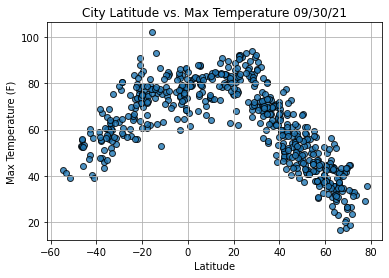

In [100]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

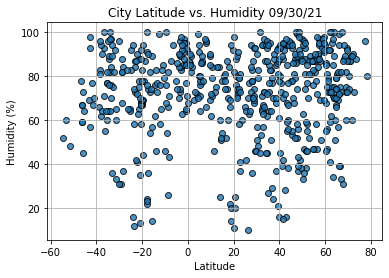

In [101]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

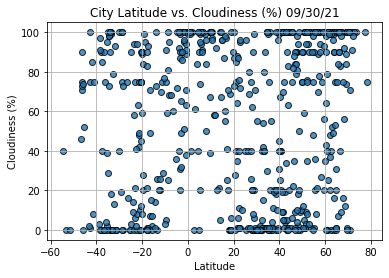

In [102]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

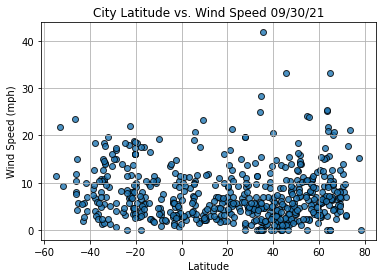

In [103]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [104]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [105]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-10-01 04:53:08
Lat                      -46.1927
Lng                      168.8643
Max Temp                    52.48
Humidity                       67
Cloudiness                     90
Wind Speed                   7.99
Name: 13, dtype: object

In [106]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
571     True
572     True
573     True
574    False
575    False
Name: Lat, Length: 576, dtype: bool

In [107]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ribeira Grande,PT,2021-10-01 04:53:26,38.5167,-28.7000,71.10,85,18,3.85
2,San Patricio,US,2021-10-01 04:53:26,28.0170,-97.5169,82.81,83,62,9.19
5,Chulman,RU,2021-10-01 04:53:27,56.8479,124.9104,30.34,89,100,10.54
7,Torbay,CA,2021-10-01 04:53:28,47.6666,-52.7314,61.57,99,90,4.61
8,La Ronge,CA,2021-10-01 04:53:28,55.1001,-105.2842,59.25,47,1,10.36


In [108]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

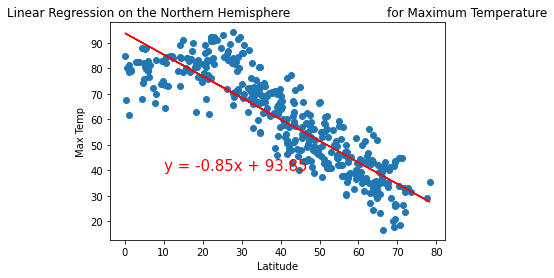

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

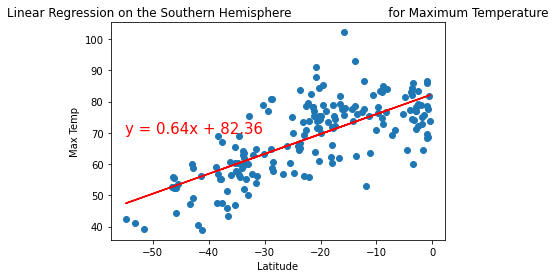

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,70))

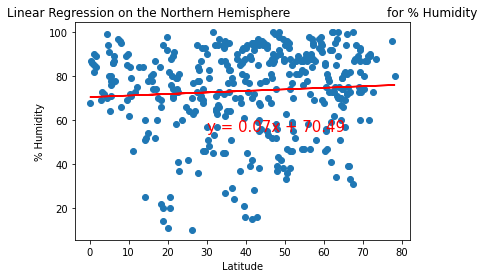

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(30,55))

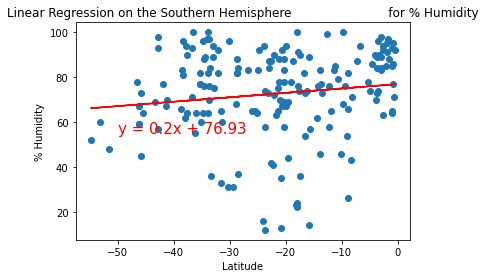

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,55))

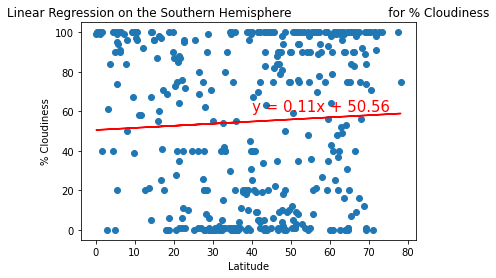

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

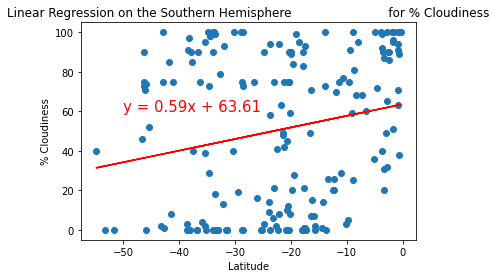

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

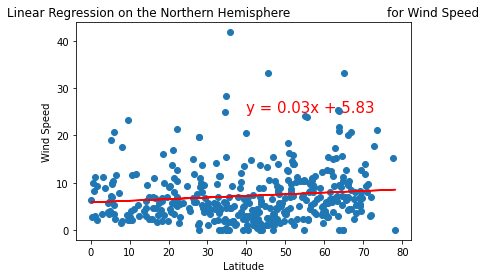

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

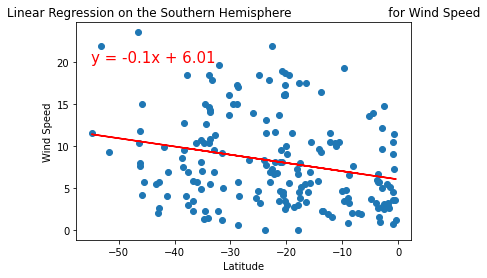

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))